In [3]:
# import things

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pwd = os.getcwd()
os.chdir('/Users/slill/Code/EXP-streams/build/pyEXP/')
# print(os.getcwd())
import pyEXP
os.chdir(pwd)


import numpy as np
import matplotlib.pyplot as plt

plt.style.use('my_latex_standard2')

datadir = '/Users/slill/Documents/Projects/exp-extreme-MWLMC/data/extreme-mwlmc'

%load_ext wurlitzer



The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer


In [4]:
# make halo basis and load halo coefficients

h_config = """
---
id: sphereSL
parameters :
  numr     : 2000
  rmin     : 0.00001
  rmax     : 2.0
  Lmax     : 6
  nmax     : 20
  rmapping : 0.0667
  modelname : Einasto_rs0.07_rhos24.913_alpha0.16_rtrunc20.txt
  cachename : EinastoR20
"""
halo_basis = pyEXP.basis.Basis.factory(h_config)
halo_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwhalo.newG5')

In [5]:
halo_keylst = halo_coefs.makeKeys([])


In [6]:
len(halo_coefs.Times())

1610

In [8]:
# make disc basis and load disc coefficients
d_config=f"""
id         : cylinder
parameters :
  acyl       : 0.029
  hcyl       : 0.004
  lmaxfid    : 72
  mmax       : 6
  nmaxfid    : 32
  nmax       : 20
  ncylodd    : 8
  ncylnx     : 512
  ncylny     : 256
  rcylmin    : 0.001
  rcylmax    : 100.0
  cachename  : {datadir}/MWeofcachenew
"""


# d_config = f"""
# id         : cylinder
# parameters :
#   acyl: 0.029 
#   hcyl: 0.004 
#   lmaxfid: 72 
#   mmax: 6 
#   nmaxfid: 32 
#   nmax: 20 
#   ncylodd: 8 
#   ncylnx: 512 
#   ncylny: 256 
#   rcylmin: 0.001 
#   rcylmax: 100.0 
#   rnum: 200 
#   pnum: 1 
#   tnum: 80 
#   vflag: 16 
#   logr: true 
#   self_consistent: true 
#   cachename: {datadir}/MWeofcachenew
# """
disc_basis = pyEXP.basis.Basis.factory(d_config)
disc_coefs = pyEXP.coefs.Coefs.factory(f'{datadir}/outcoef.mwdisk.RunG5')

In [ ]:
disc_keylst = disc_coefs.makeKeys([1])

### View basis

In [13]:
# Get the two basis grids
#
lrmin = -3.0
lrmax = 1
rnum  = 200
halo_grid = halo_basis.getBasis(lrmin, lrmax, rnum)

Rmin = 0.0
Rmax = 0.1
Rnum = 100
Zmin = -0.03
Zmax =  0.03
Znum = 40

# disk_grid = disc_basis.getBasis(Rmin, Rmax, Rnum, Zmin, Zmax, Znum)

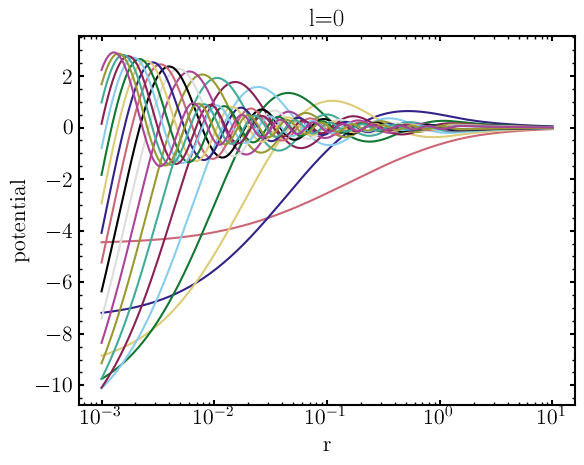

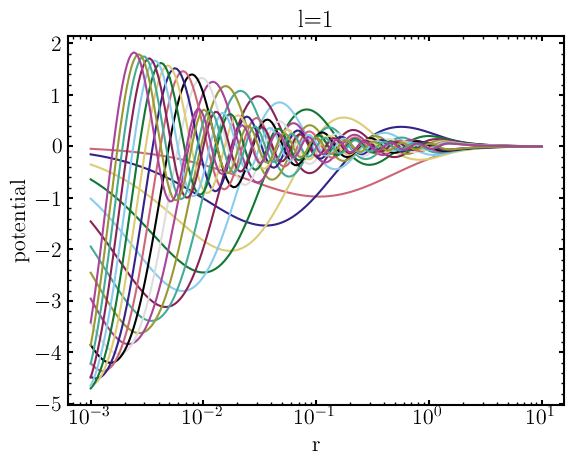

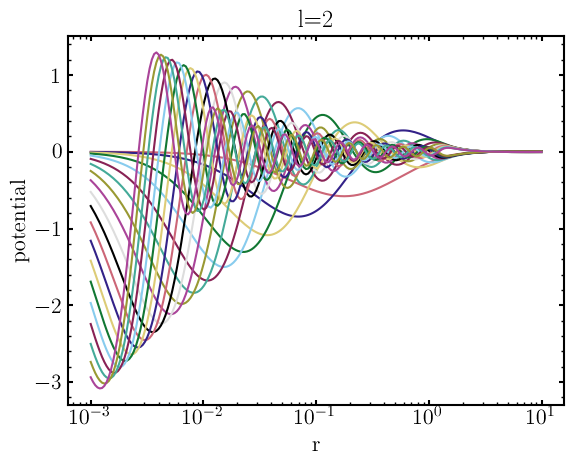

In [14]:
# Make a logarithmically space grid in radius
#
r = np.linspace(lrmin, lrmax, rnum)
r = np.power(10.0, r)

for l in range(3):
    for n in range(20):
        plt.semilogx(r, halo_grid[l][n]['potential'], '-', label="n={}".format(n))
    plt.xlabel('r')
    plt.ylabel('potential')
    plt.title('l={}'.format(l))
    # plt.legend()
    plt.show()

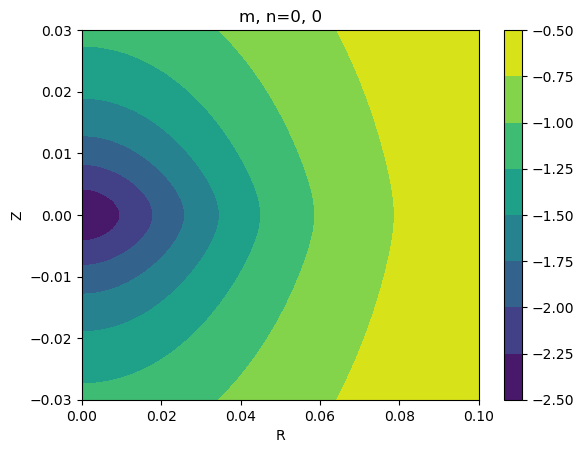

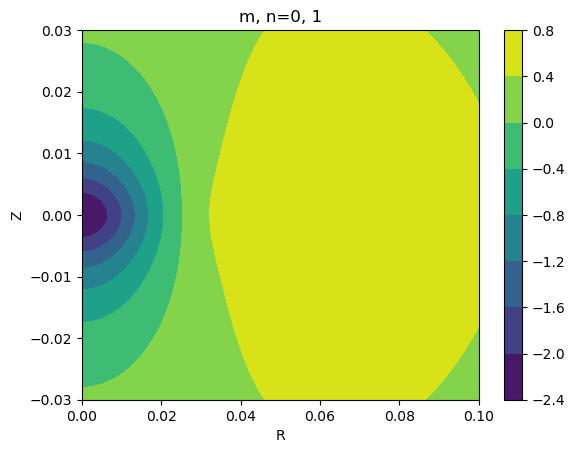

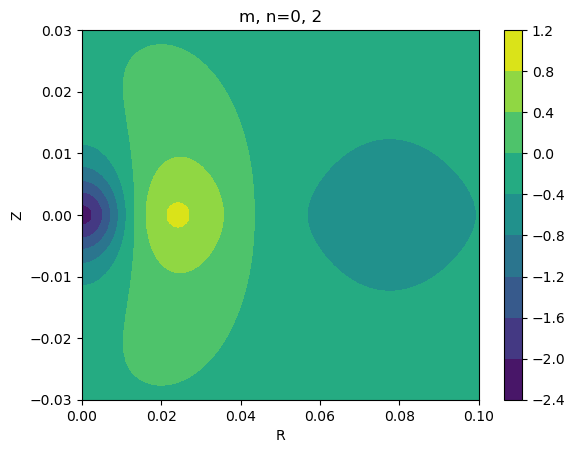

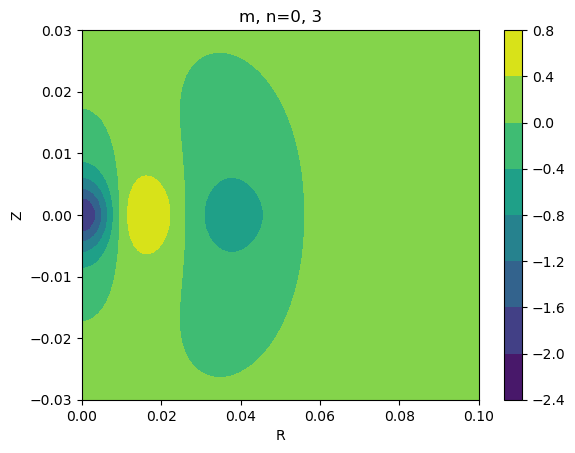

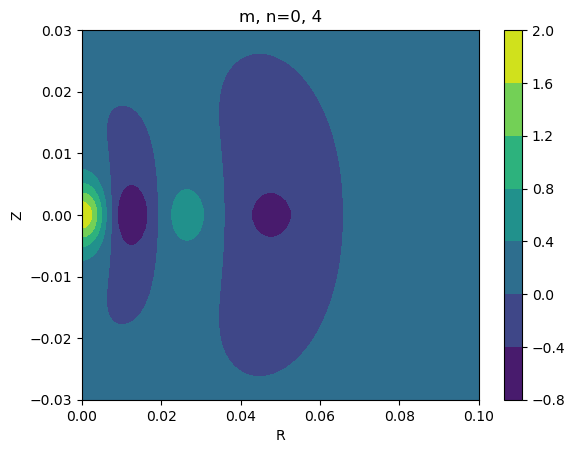

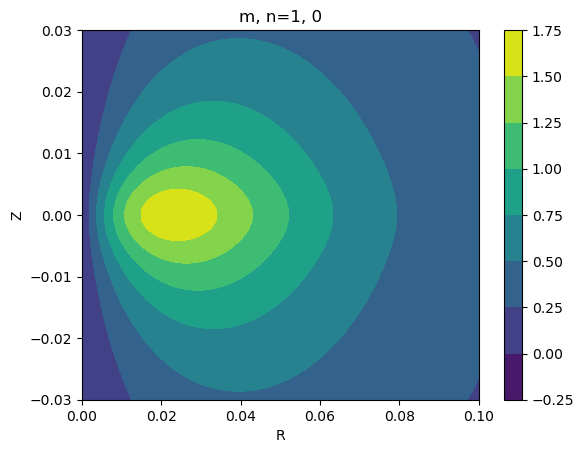

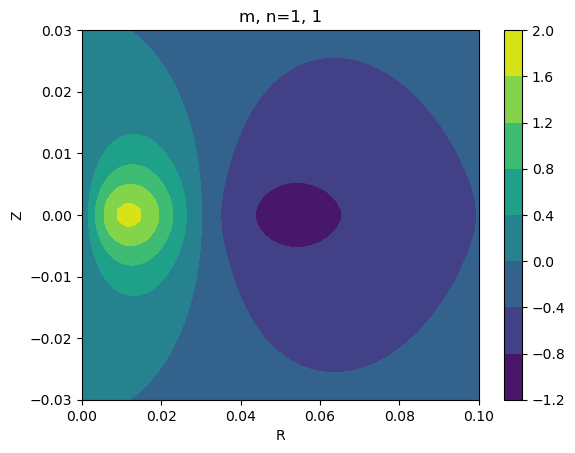

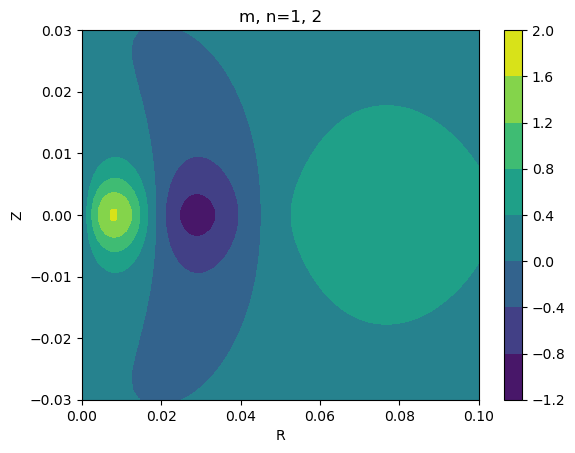

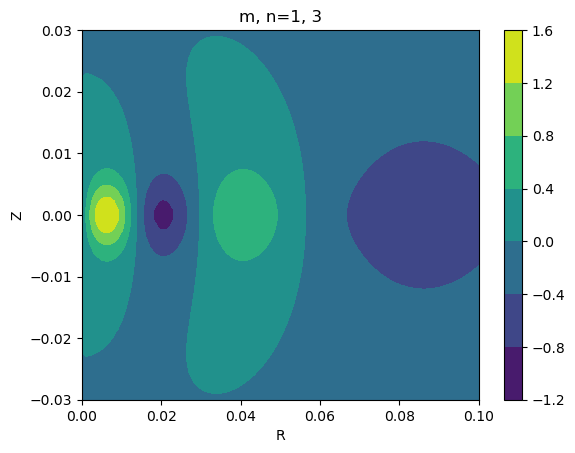

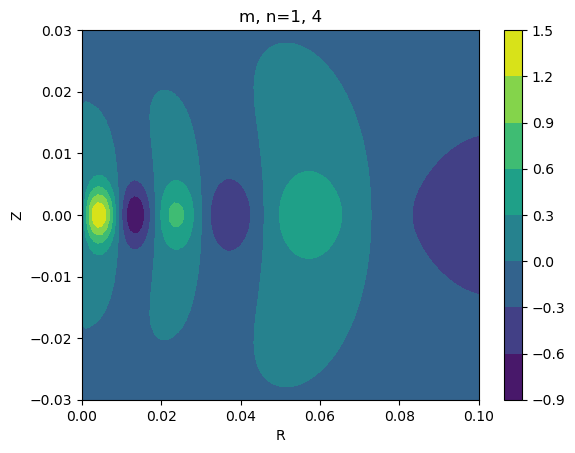

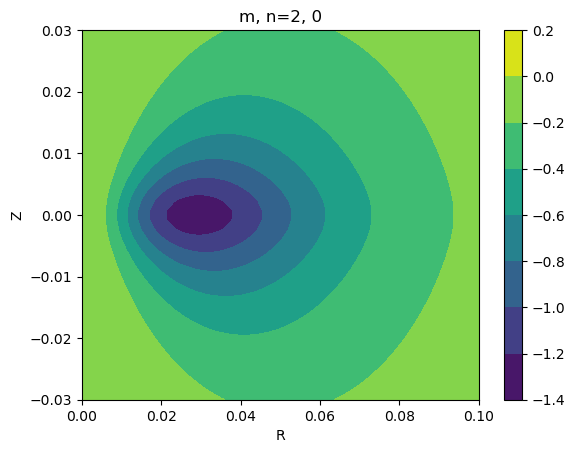

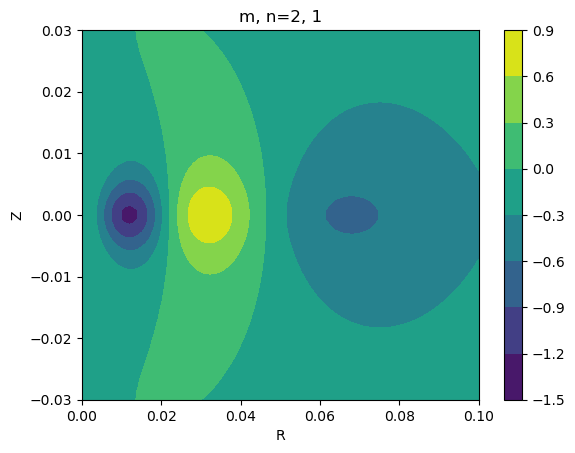

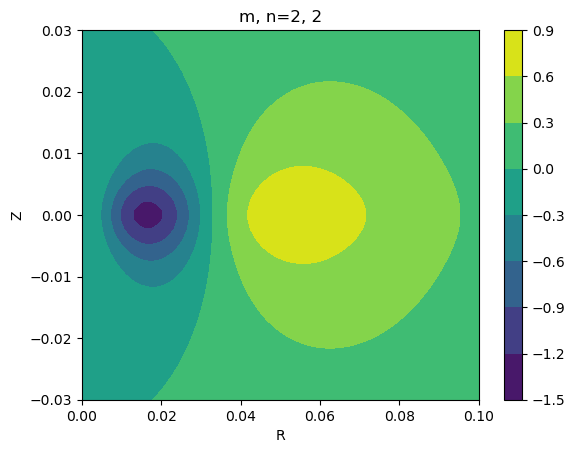

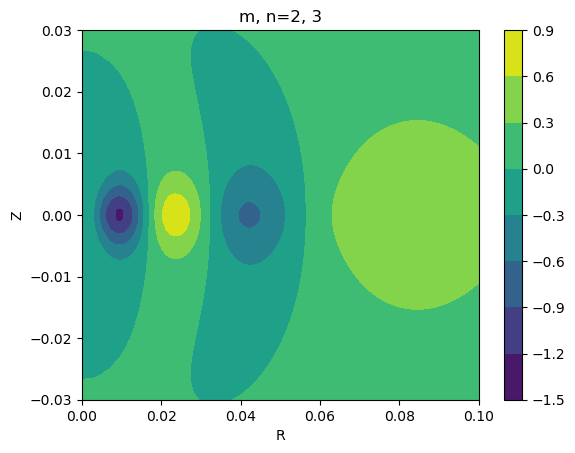

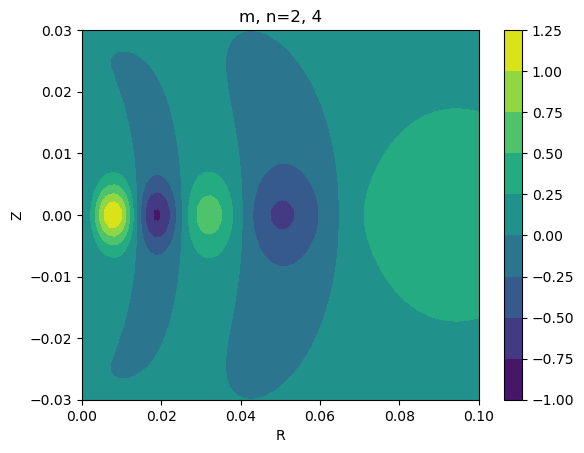

In [ ]:
  
R = np.linspace(Rmin, Rmax, Rnum)
Z = np.linspace(Zmin, Zmax, Znum)

xv, yv = np.meshgrid(R, Z)

for m in range(3):
    for n in range(5):
        # Tranpose for contourf
        cx = plt.contourf(xv, yv, disk_grid[m][n]['potential'].transpose())
        plt.xlabel('R')
        plt.ylabel('Z')
        plt.title('m, n={}, {}'.format(m, n))
        plt.colorbar(cx)
        plt.show()

### View coefficients

In [9]:
times

[0.0,
 0.0016,
 0.0032,
 0.0048,
 0.0064,
 0.008,
 0.0096,
 0.0112,
 0.0128,
 0.0144,
 0.016,
 0.0176,
 0.0192,
 0.0208,
 0.0224,
 0.024,
 0.0256,
 0.0272,
 0.0288,
 0.0304,
 0.032,
 0.0336,
 0.0352,
 0.0368,
 0.0384,
 0.04,
 0.0416,
 0.0432,
 0.0448,
 0.0464,
 0.048,
 0.0496,
 0.0512,
 0.0528,
 0.0544,
 0.056,
 0.0576,
 0.0592,
 0.0608,
 0.0624,
 0.064,
 0.0656,
 0.0672,
 0.0688,
 0.0704,
 0.072,
 0.0736,
 0.0752,
 0.0768,
 0.0784,
 0.08,
 0.0816,
 0.0832,
 0.0848,
 0.0864,
 0.088,
 0.0896,
 0.0912,
 0.0928,
 0.0944,
 0.096,
 0.0976,
 0.0992,
 0.1008,
 0.1024,
 0.104,
 0.1056,
 0.1072,
 0.1088,
 0.1104,
 0.112,
 0.1136,
 0.1152,
 0.1168,
 0.1184,
 0.12,
 0.1216,
 0.1232,
 0.1248,
 0.1264,
 0.128,
 0.1296,
 0.1312,
 0.1328,
 0.1344,
 0.136,
 0.1376,
 0.1392,
 0.1408,
 0.1424,
 0.144,
 0.1456,
 0.1472,
 0.1488,
 0.1504,
 0.152,
 0.1536,
 0.1552,
 0.1568,
 0.1584,
 0.16,
 0.1616,
 0.1632,
 0.1648,
 0.1664,
 0.168,
 0.1696,
 0.1712,
 0.1728,
 0.1744,
 0.176,
 0.1776,
 0.1792,
 0.1808,
 0.

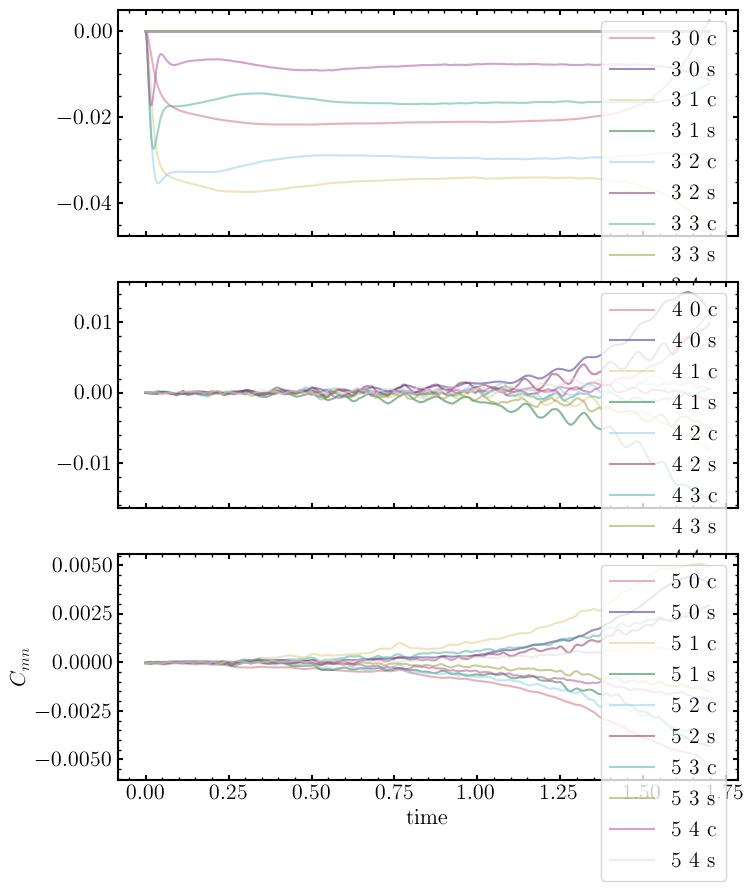

In [10]:
data  = np.array(halo_coefs.getAllCoefs())
times = np.array(halo_coefs.Times())
tref = 1.7

mask = times < tref

n_l = 3
n_n = 5
fig, axs = plt.subplots(n_l, 1, figsize=(8, 10), sharex=True)
for m in range(n_l):
    for n in range(0,n_n):
        if (m+3)==0:
            axs[m].plot(times[mask], np.real(data[m+3, n, :][mask]), label='{} {}'.format(m+3, n))
        else:
            axs[m].plot(times[mask], np.real(data[m+3, n, :][mask]), label='{} {} c'.format(m+3, n), alpha=0.5)
            axs[m].plot(times[mask], np.imag(data[m+3, n, :][mask]), label='{} {} s'.format(m+3, n), alpha=0.5)
    axs[m].legend()
axs[-1].set_xlabel('time')
axs[1].set_ylabel(r'$C_{mn}$')

plt.show()

Text(0, 0.5, '$C_{mn}$')

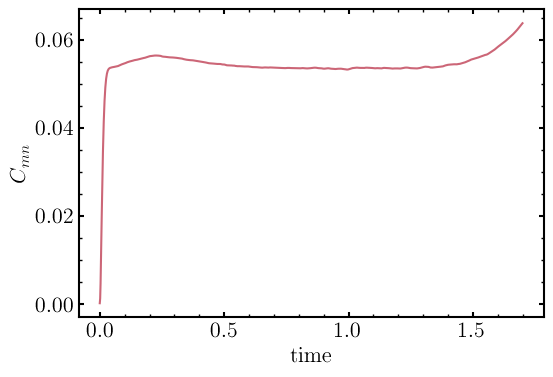

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(6,4), sharex=True)
linestyle = ['-', '--', '-.']
axs.plot(times[mask], 
         np.linalg.norm(np.linalg.norm(data[3:6, :, :], axis=1), axis=0)[mask], 
         label='{} {}'.format(m+3, n), ls='-')

axs.set_xlabel('time')
axs.set_ylabel(r'$C_{mn}$')

In [29]:
m=2
mwhalo_keylst = mwhalo_coefs.makeKeys([m])
lmchalo_keylst = lmchalo_coefs.makeKeys([m])




(28, 20, 1901)

In [7]:
halo_coefs.getAllCoefs()

array([[[ 5.28064106e+00+0.00000000e+00j,
          5.28062808e+00+0.00000000e+00j,
          5.28058490e+00+0.00000000e+00j, ...,
          5.12548781e+00+0.00000000e+00j,
          5.12516212e+00+0.00000000e+00j,
          5.12484139e+00+0.00000000e+00j],
        [ 5.28064106e+00+0.00000000e+00j,
          5.28062808e+00+0.00000000e+00j,
          5.28058490e+00+0.00000000e+00j, ...,
          5.12548781e+00+0.00000000e+00j,
          5.12516212e+00+0.00000000e+00j,
          5.12484139e+00+0.00000000e+00j],
        [ 5.28064106e+00+0.00000000e+00j,
          5.28062808e+00+0.00000000e+00j,
          5.28058490e+00+0.00000000e+00j, ...,
          5.12548781e+00+0.00000000e+00j,
          5.12516212e+00+0.00000000e+00j,
          5.12484139e+00+0.00000000e+00j],
        ...,
        [ 5.28064106e+00+0.00000000e+00j,
          5.28062808e+00+0.00000000e+00j,
          5.28058490e+00+0.00000000e+00j, ...,
          5.12548781e+00+0.00000000e+00j,
          5.12516212e+00+0.00000000e+00j

In [8]:
times = disc_coefs.Times()
data  = disc_coefs.getAllCoefs()

fig, ax = plt.subplots(2, 1)
for n in range(0, 3):
    ax[0].plot(times, np.real(data[0, n, :]), label='{} {}'.format(0, n))
ax[0].set_ylabel(r'$C_{0n}$')
ax[0].legend(bbox_to_anchor=(1.15, 1.0))

for m in range(3):
    for n in range(1,3):
        if m==0:
            ax[1].plot(times, np.real(data[m, n, :]), label='{} {}'.format(m, n))
        else:
            ax[1].plot(times, np.real(data[m, n, :]), label='{} {} c'.format(m, n))
            ax[1].plot(times, np.imag(data[m, n, :]), label='{} {} s'.format(m, n))
ax[1].set_xlabel('time')
ax[1].set_ylabel(r'$C_{mn}$')
ax[1].legend(bbox_to_anchor=(1.15, 1.0))

plt.tight_layout()
plt.show()

NameError: name 'disc_coefs' is not defined

In [22]:
flags ="""
---
# chatty: on
output: fulltest_default
...
"""
config = {"disk": (disc_coefs, disc_keylst, []), 
          "halo": (halo_coefs, halo_keylst, [])}
window = int(len(disc_coefs.Times())/2)
npc = 100
print("Window={} PC number={}".format(window, npc))



Window=366 PC number=100


In [23]:
ssa = pyEXP.mssa.expMSSA(config, window, npc, flags)


---- Eigen is using 10 threads


In [24]:
ev = ssa.eigenvalues() 

shape U = 29280 x 100
